# Consignes

Intégrer le fichier USvideos.csv qui représente un ensemble de 8000 vidéos Youtube. 

Merger le fichier US_category_id.json pour récupérer le nom des catégories. Il conviendra de bien spécifier l'ID du document.


# Questions 
- 1) Récupérer toutes les vidéos de la chaîne Apple.
- 2) Compter le nombre de catégories différentes
- 3) Si vous ne l'avez pas déjà fait, découper les tags en listes et mettre à jour les tags de chacun des documents avec une requête update.
- 4) Récupérer les vidéos les plus vues.
- 5) Compter le nombre moyen de vues en fonction de la catégorie.
- 6) Récupérer les chaines Youtube avec la plus grande moyenne de likes.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymongo
import json

In [23]:
client = pymongo.MongoClient(host=['mongodb://172.18.0.5:27017'])

In [24]:
df_youtube = pd.read_csv("./data/USvideos.csv")
df_youtube.head(2)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09


## Question 0

### Netoyer les données

In [25]:
df_youtube['date'] = pd.to_datetime(df_youtube['date'], errors='coerce')
df_youtube = df_youtube.dropna(subset=['date'])


df_youtube.rename(columns={'video_id':'_id'}, inplace=True)

df_youtube = df_youtube.drop_duplicates(subset='_id', keep='last')
print(df_youtube.columns)

Index(['_id', 'title', 'channel_title', 'category_id', 'tags', 'views',
       'likes', 'dislikes', 'comment_total', 'thumbnail_link', 'date'],
      dtype='object')


In [27]:
df_youtube = df_youtube.drop(['dislikes','comment_total','thumbnail_link'],axis=1)

In [28]:
#question3
videos =df_youtube.to_dict(orient='records')
for video in videos:
    video['tags'] = video['tags'].split('|')

with open('./data/US_category_id.json', 'r') as f:
    categ = json.load(f)

for video in videos:
    for cat in categ['items']:
        if video['category_id'] == int(cat['id']):
            video['category'] = cat['snippet']['title']

### Importer les données

In [29]:
db_exercices = client.exercices
collection_youtube = db_exercices['youtube']

In [30]:
collection_youtube.insert_many(videos)

In [31]:
db_exercices.list_collection_names()

['kickstarter', 'youtube']

## Question 1  

In [32]:
cur = collection_youtube.find({'channel_title':'Apple'})
for video in cur:
    print(video['title'])

iPhone X — Introducing iPhone X — Apple
Apple Watch Series 3 + Apple Music — Roll — Apple
iPhone 8 Plus — Portraits of Her  — Apple


## Question 2

In [36]:
categories = collection_youtube.distinct('category')
print(len(categories))

16


## Question 3

## Question 4

/root/.local/share/virtualenvs/code-AFz48Hjb/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/.local/share/virtualenvs/code-AFz48Hjb/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/.local/share/virtualenvs/code-AFz48Hjb/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/.local/share/virtualenvs/code-AFz48Hjb/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/.local/share/virtualenvs/code-AFz48Hjb/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_t

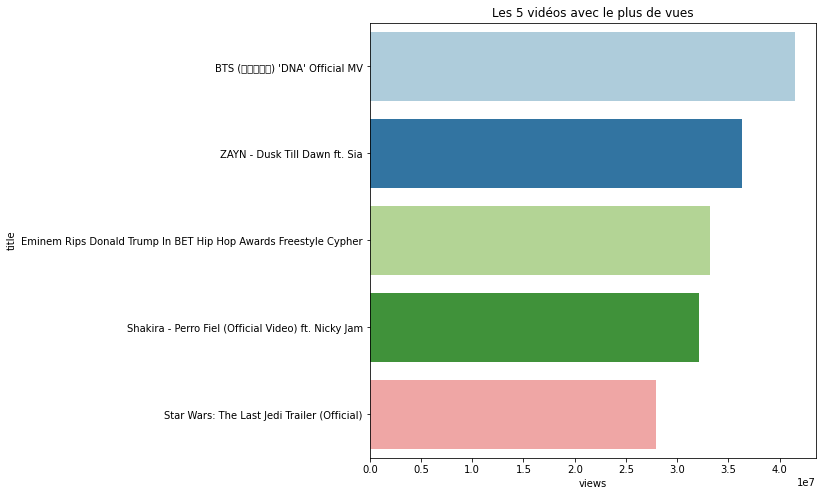

In [42]:
cur = collection_youtube.find().sort('views',-1).limit(5)
result = pd.DataFrame(list(cur))
plt.figure( figsize = (8,8) )
plt.title('Les 5 vidéos avec le plus de vues')
sns.barplot(x='views',y='title',data=result,palette='Paired')
plt.show()

## Question 5

In [47]:
cur = collection_youtube.aggregate([{'$group':{'_id':'$category','averageViewsByCategory':{'$avg':'$views'}}}])
list(cur)

[{'_id': 'People & Blogs', 'averageViewsByCategory': 892992.28515625},
 {'_id': 'Gaming', 'averageViewsByCategory': 777213.0357142857},
 {'_id': 'Howto & Style', 'averageViewsByCategory': 556002.6679389313},
 {'_id': 'Autos & Vehicles', 'averageViewsByCategory': 622727.8648648649},
 {'_id': 'Shows', 'averageViewsByCategory': 8726.0},
 {'_id': 'Travel & Events', 'averageViewsByCategory': 426492.22222222225},
 {'_id': 'Science & Technology', 'averageViewsByCategory': 861563.6158940397},
 {'_id': 'Pets & Animals', 'averageViewsByCategory': 633906.4210526316},
 {'_id': 'Sports', 'averageViewsByCategory': 618074.711409396},
 {'_id': 'News & Politics', 'averageViewsByCategory': 533575.1262626263},
 {'_id': 'Comedy', 'averageViewsByCategory': 1317200.7289719626},
 {'_id': 'Nonprofits & Activism', 'averageViewsByCategory': 681178.2},
 {'_id': 'Music', 'averageViewsByCategory': 1442240.943283582},
 {'_id': 'Entertainment', 'averageViewsByCategory': 1059427.7735849055},
 {'_id': 'Film & Animatio

## Question 6 

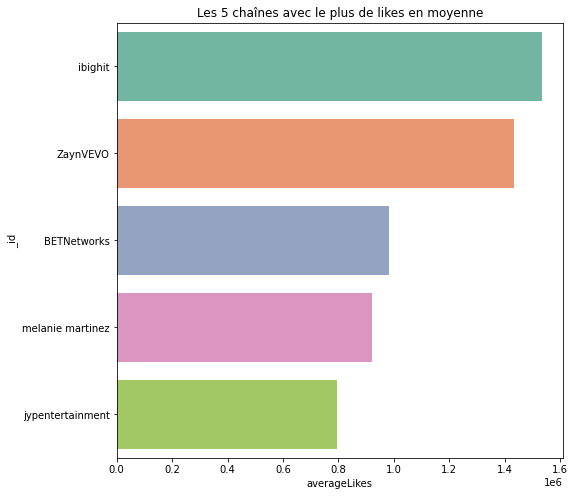

In [59]:
cur = collection_youtube.aggregate([{'$group':{'_id':'$channel_title','averageLikes':{'$avg':'$likes'}}},{'$sort':{'averageLikes':-1}},{'$limit':5}])
result = pd.DataFrame(list(cur))
plt.figure( figsize = (8,8) )
plt.title('Les 5 chaînes avec le plus de likes en moyenne')
sns.barplot(x='averageLikes',y='_id',data=result,palette='Set2')
plt.show()